In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

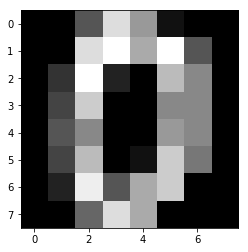

In [6]:
plt.gray() 
plt.imshow(digits.images[0])
plt.show()

In [7]:
digits.images.shape

(1797, 8, 8)

In [8]:
digits.target[:] #1797 actual number tags associated with input images

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
list(zip([1,2,3],['a','b','c'])) #This is what zip does

[(1, 'a'), (2, 'b'), (3, 'c')]

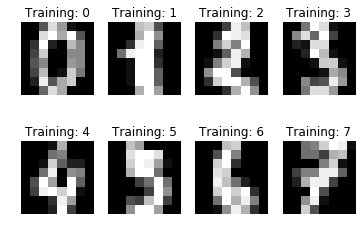

In [10]:
#Looking at first 8 images
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)   #2 rows of plots, 4 colums each and plot no. varies from 1 to 8 given by index+1
    plt.axis('off')
    plt.imshow(image,interpolation='nearest') #interpolation will increase image visualization
    plt.title('Training: %d' % label)

In [11]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [18]:
n_samples

1797

In [12]:
data.shape

(1797, 64)

In [13]:
# Create a classifier: a random forest classifier
classifier = RandomForestClassifier(n_estimators=30, criterion='entropy')

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [15]:
classifier.score(data[n_samples // 2:], expected)

0.9265850945494994

In [16]:
metrics.confusion_matrix(expected, predicted)

array([[86,  0,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0, 83,  0,  1,  0,  1,  0,  0,  0,  6],
       [ 1,  0, 77,  4,  0,  0,  0,  0,  1,  3],
       [ 1,  1,  3, 76,  0,  1,  0,  2,  6,  1],
       [ 1,  1,  0,  0, 86,  2,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  0,  1,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 86,  2,  0],
       [ 0,  2,  0,  1,  1,  4,  1,  1, 78,  0],
       [ 0,  1,  0,  2,  0,  4,  0,  1,  1, 83]], dtype=int64)

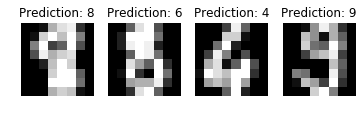

In [17]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image)
    plt.title('Prediction: %d' % prediction)

plt.show()